In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("data/sales_data_sample.csv",encoding="latin1")
df.head(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,...,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,NaN,Hirano,Juri,Medium
6,10180,29,86.13,9,2497.77,11/11/2003 0:00,Shipped,4,11,2003,...,"184, chausse de Tournai",NaN,Lille,NaN,59000,France,EMEA,Rance,Martine,Small
7,10188,48,100.00,1,5512.32,11/18/2003 0:00,Shipped,4,11,2003,...,"Drammen 121, PR 744 Sentrum",NaN,Bergen,NaN,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
8,10201,22,98.57,2,2168.54,12/1/2003 0:00,Shipped,4,12,2003,...,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,NaN,Murphy,Julie,Small
9,10211,41,100.00,14,4708.44,1/15/2004 0:00,Shipped,1,1,2004,...,"25, rue Lauriston",NaN,Paris,NaN,75016,France,EMEA,Perrier,Dominique,Medium


In [6]:
df.shape

(2823, 25)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [8]:
df["TERRITORY"]

0        NaN
1       EMEA
2       EMEA
3        NaN
4        NaN
        ... 
2818    EMEA
2819    EMEA
2820    EMEA
2821    EMEA
2822     NaN
Name: TERRITORY, Length: 2823, dtype: object

REMOVING NULL VALUES IN TERRITORY COLUMN

In [9]:
df["TERRITORY"]=df["TERRITORY"].fillna("Unknown")

NOW CHECKING IF ALL THE NULL VALUES HAVE REMOVED FROM TERRITORY

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


NOW REMOVING NULL VALUES FROM POSTAL CODE

In [11]:
missing_percentage=(df["POSTALCODE"].isna().sum()/len(df))*100
print(f"Missing postalcode: {missing_percentage:.2f}%")

Missing postalcode: 2.69%


In [12]:
df = df.dropna(subset=["POSTALCODE"])

NOW CHECKING IF ALL ROWS HAVE BEEN REMOVED IF MISSING POSTAL CODE

In [13]:
df["STATE"]

0        NY
1       NaN
2       NaN
3        CA
5        CA
       ... 
2818    NaN
2819    NaN
2820    NaN
2821    NaN
2822     MA
Name: STATE, Length: 2747, dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2747 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2747 non-null   int64  
 1   QUANTITYORDERED   2747 non-null   int64  
 2   PRICEEACH         2747 non-null   float64
 3   ORDERLINENUMBER   2747 non-null   int64  
 4   SALES             2747 non-null   float64
 5   ORDERDATE         2747 non-null   object 
 6   STATUS            2747 non-null   object 
 7   QTR_ID            2747 non-null   int64  
 8   MONTH_ID          2747 non-null   int64  
 9   YEAR_ID           2747 non-null   int64  
 10  PRODUCTLINE       2747 non-null   object 
 11  MSRP              2747 non-null   int64  
 12  PRODUCTCODE       2747 non-null   object 
 13  CUSTOMERNAME      2747 non-null   object 
 14  PHONE             2747 non-null   object 
 15  ADDRESSLINE1      2747 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 
 17  

In [15]:
df["STATE"]=df["STATE"].fillna("Unknown")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2747 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2747 non-null   int64  
 1   QUANTITYORDERED   2747 non-null   int64  
 2   PRICEEACH         2747 non-null   float64
 3   ORDERLINENUMBER   2747 non-null   int64  
 4   SALES             2747 non-null   float64
 5   ORDERDATE         2747 non-null   object 
 6   STATUS            2747 non-null   object 
 7   QTR_ID            2747 non-null   int64  
 8   MONTH_ID          2747 non-null   int64  
 9   YEAR_ID           2747 non-null   int64  
 10  PRODUCTLINE       2747 non-null   object 
 11  MSRP              2747 non-null   int64  
 12  PRODUCTCODE       2747 non-null   object 
 13  CUSTOMERNAME      2747 non-null   object 
 14  PHONE             2747 non-null   object 
 15  ADDRESSLINE1      2747 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 
 17  

In [17]:
df["ADDRESSLINE2"].head(20)

0           NaN
1           NaN
2           NaN
3           NaN
5           NaN
6           NaN
7           NaN
9           NaN
10      Level 3
11    Suite 101
12          NaN
13          NaN
14          NaN
15          NaN
16          NaN
17          NaN
18          NaN
19          NaN
20          NaN
21      Level 6
Name: ADDRESSLINE2, dtype: object

In [18]:
df["ADDRESSLINE2"]=df["ADDRESSLINE2"].fillna("N/A")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2747 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2747 non-null   int64  
 1   QUANTITYORDERED   2747 non-null   int64  
 2   PRICEEACH         2747 non-null   float64
 3   ORDERLINENUMBER   2747 non-null   int64  
 4   SALES             2747 non-null   float64
 5   ORDERDATE         2747 non-null   object 
 6   STATUS            2747 non-null   object 
 7   QTR_ID            2747 non-null   int64  
 8   MONTH_ID          2747 non-null   int64  
 9   YEAR_ID           2747 non-null   int64  
 10  PRODUCTLINE       2747 non-null   object 
 11  MSRP              2747 non-null   int64  
 12  PRODUCTCODE       2747 non-null   object 
 13  CUSTOMERNAME      2747 non-null   object 
 14  PHONE             2747 non-null   object 
 15  ADDRESSLINE1      2747 non-null   object 
 16  ADDRESSLINE2      2747 non-null   object 
 17  

---------------------NOW ALL NULL VALUES HAVE BEEN REMOVED-------------------------

CHECKING FOR DUPLICATES

In [20]:
df.duplicated().any()


np.False_

In [21]:
duplicates = df[df.duplicated()]
print(duplicates)


Empty DataFrame
Columns: [ORDERNUMBER, QUANTITYORDERED, PRICEEACH, ORDERLINENUMBER, SALES, ORDERDATE, STATUS, QTR_ID, MONTH_ID, YEAR_ID, PRODUCTLINE, MSRP, PRODUCTCODE, CUSTOMERNAME, PHONE, ADDRESSLINE1, ADDRESSLINE2, CITY, STATE, POSTALCODE, COUNTRY, TERRITORY, CONTACTLASTNAME, CONTACTFIRSTNAME, DEALSIZE]
Index: []

[0 rows x 25 columns]


-------------------------------------------NO DUPLICATES-----------------------------------------------

CHECKING FOR OUTLIERS

In [22]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,10259.761558,35.103021,83.648966,6.491081,3553.047583,2.711685,7.083364,2003.822352,100.691664
std,91.877521,9.762135,20.144229,4.230544,1838.953901,1.196264,3.641826,0.696288,40.114802
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,2.000000,4.000000,2003.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,3.000000,8.000000,2004.000000,99.000000
75%,10334.500000,43.000000,100.000000,9.000000,4503.095000,4.000000,11.000000,2004.000000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.000000,214.000000


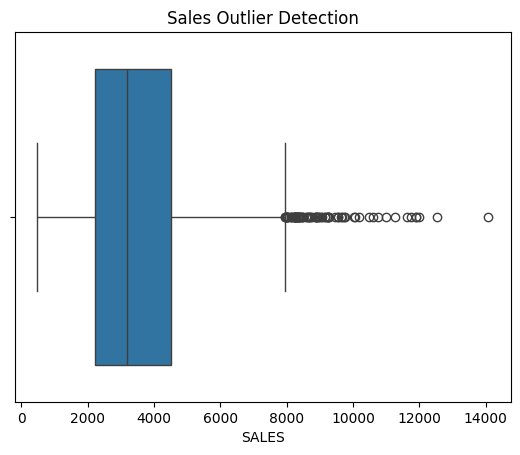

In [23]:
sns.boxplot(x=df['SALES'])
plt.title("Sales Outlier Detection")
plt.savefig("sales_outlier_detection.png")
plt.show()

In [24]:
Q1 = df['SALES'].quantile(0.25)
Q3 = df['SALES'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['SALES'] < Q1 - 1.5 * IQR) | (df['SALES'] > Q3 + 1.5 * IQR)]
print(outliers["SALES"])

customers_outliers = outliers['SALES'].nunique()
print(f"Unique customers with outlier sales: {customers_outliers}")


30      10993.50
32       8014.82
35       9064.89
41       8014.82
43      10172.70
          ...   
2241     8844.12
2295     8209.44
2430     8977.05
2505    10066.60
2634     9558.80
Name: SALES, Length: 79, dtype: float64
Unique customers with outlier sales: 77


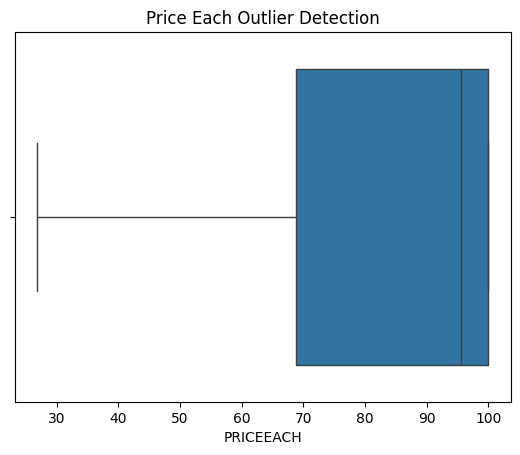

In [25]:
sns.boxplot(x=df['PRICEEACH'])
plt.title("Price Each Outlier Detection")
plt.savefig("price_each_outlier_detection.png")
plt.show()

In [26]:
Q1 = df['SALES'].quantile(0.25)
Q3 = df['SALES'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['SALES'] < Q1 - 1.5 * IQR) | (df['SALES'] > Q3 + 1.5 * IQR)]
customers_outliers = outliers['SALES'].nunique()
print(f"Unique customers with outlier sales: {customers_outliers}")


Unique customers with outlier sales: 77


----------------------------------------VISUALIZING AND SUMMARIZING STATISTICS----------------------------

What is the total revenue generated over the entire dataset?

In [27]:
revenue=df["SALES"].sum()
print(f"The total revenue generated over the entire dataset: {revenue}")

The total revenue generated over the entire dataset: 9760221.71


How do monthly sales trends look over the years?

In [28]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
monthly_sales = df.groupby(df['ORDERDATE'].dt.to_period('M'))['SALES'].sum()

print(monthly_sales)

ORDERDATE
2003-01     129753.60
2003-02     140836.19
2003-03     155809.32
2003-04     201609.55
2003-05     192673.11
2003-06     168082.56
2003-07     187731.88
2003-08     197809.30
2003-09     263973.36
2003-10     448452.95
2003-11    1029837.66
2003-12     236444.58
2004-01     292688.10
2004-02     311419.53
2004-03     205733.73
2004-04     206148.12
2004-05     273438.39
2004-06     286674.22
2004-07     327144.09
2004-08     461501.27
2004-09     320750.91
2004-10     552924.25
2004-11    1058699.29
2004-12     372802.66
2005-01     339543.42
2005-02     303982.56
2005-03     374262.76
2005-04     261633.29
2005-05     457861.06
Freq: M, Name: SALES, dtype: float64


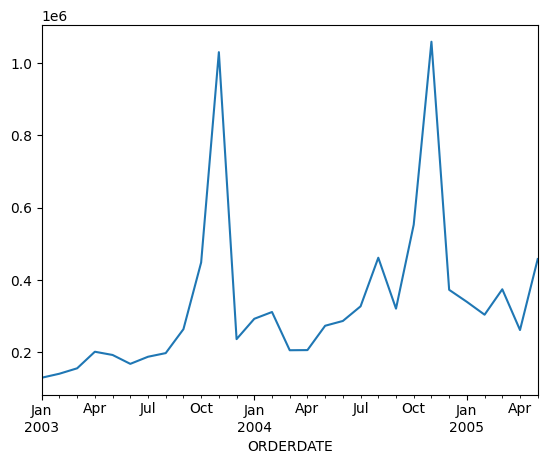

In [29]:
monthly_sales.plot()
plt.savefig("monthly_sales.png")
plt.show()

In [30]:
df["ORDERDATE"].tail(10)

2813   2004-09-09
2814   2004-10-14
2815   2004-10-29
2816   2004-11-10
2817   2004-11-21
2818   2004-12-02
2819   2005-01-31
2820   2005-03-01
2821   2005-03-28
2822   2005-05-06
Name: ORDERDATE, dtype: datetime64[ns]

WHICH YEAR DID THE HGHEST SALE?

   YEAR_ID       SALES
0     2003  3353014.06
1     2004  4669924.56
2     2005  1737283.09


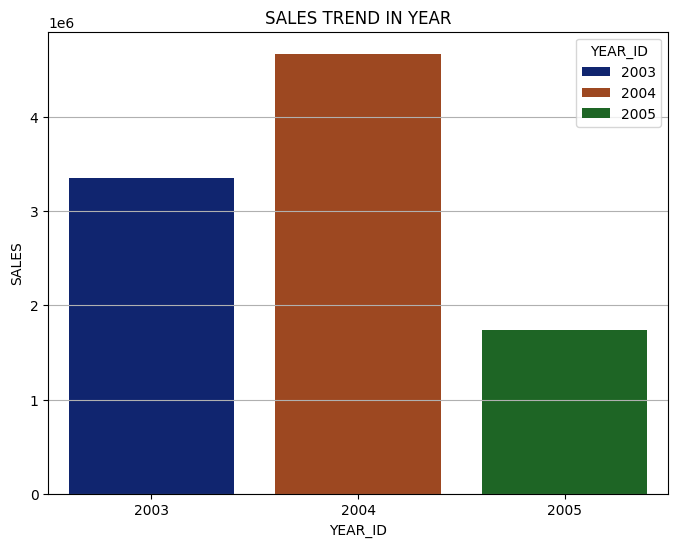

In [32]:
yearly_sales=df.groupby("YEAR_ID")["SALES"].sum().reset_index()
print(yearly_sales)
plt.figure(figsize=(8,6))
plt.grid("gray")
sns.barplot(x="YEAR_ID",y="SALES",data=yearly_sales,hue="YEAR_ID",palette="dark")
plt.title("SALES TREND IN YEAR")
plt.savefig("sales_trend_in_year.png")
plt.show()

Which quarter has the highest total sales?

In [33]:
quarter_sales=df.groupby("QTR_ID")["SALES"].sum().reset_index()
print(quarter_sales)
# Find quarter with highest sales
quarter = quarter_sales.loc[quarter_sales["SALES"].idxmax(), "QTR_ID"]
print(f"{quarter} has highes sales")

   QTR_ID       SALES
0       1  2254029.21
1       2  2048120.30
2       3  1758910.81
3       4  3699161.39
4 has highes sales


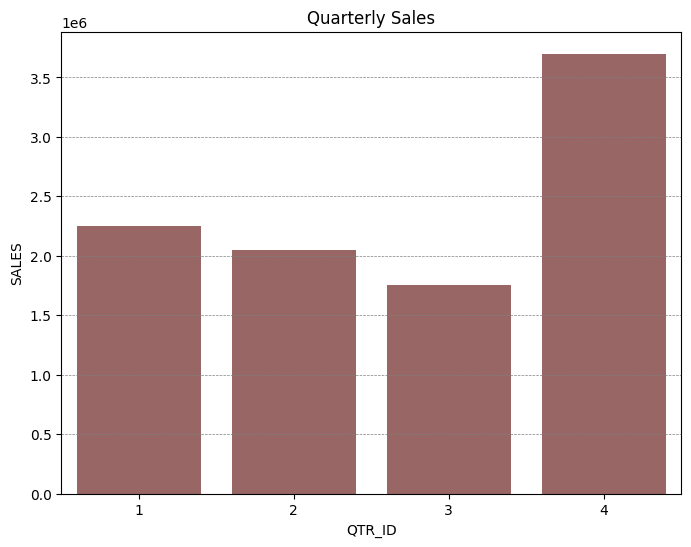

In [34]:
plt.figure(figsize=(8,6))
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
sns.barplot(x="QTR_ID", y="SALES", data=quarter_sales, color="red", saturation=0.2)
plt.title("Quarterly Sales")
plt.savefig("quarterly_sales.png")
plt.show()

What is the average order value per customer?

89


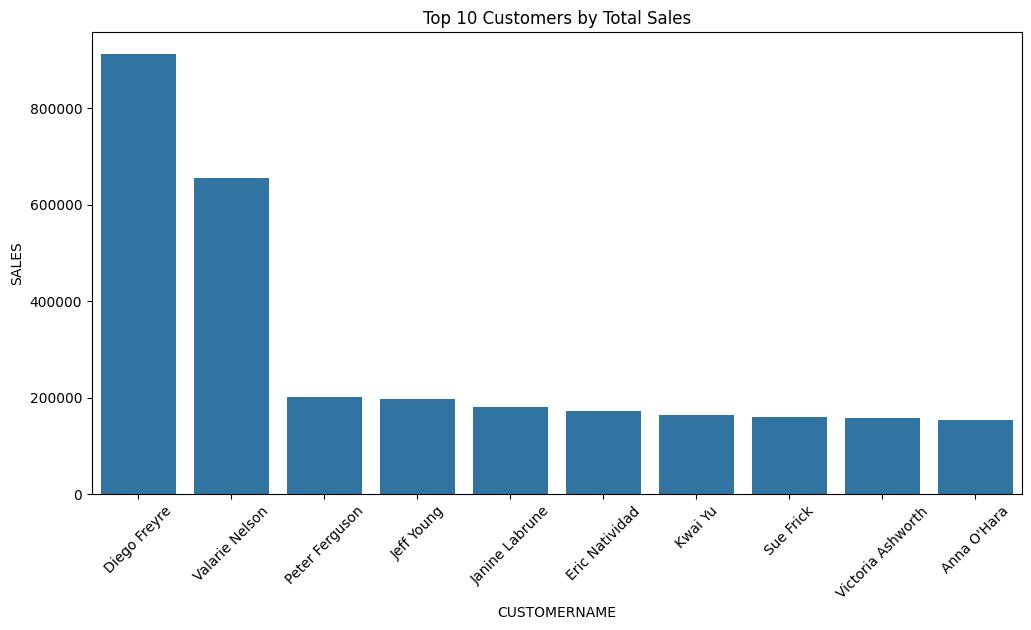

In [35]:
# Combine first and last name
df["CUSTOMERNAME"] = df["CONTACTFIRSTNAME"] + ' ' + df["CONTACTLASTNAME"]

# Group total sales per customer
avg_sales_per_customer = df.groupby('CUSTOMERNAME')['SALES'].sum().reset_index()

# Number of unique customers
print(df["CUSTOMERNAME"].nunique())

# Plot Top 10 customers
plt.figure(figsize=(12,6))
sns.barplot(
    x='CUSTOMERNAME',
    y='SALES',
    data=avg_sales_per_customer.sort_values('SALES', ascending=False).head(10)
)
plt.title('Top 10 Customers by Total Sales')
plt.xticks(rotation=45)
plt.savefig("top10_customers_by_totalsales")
plt.show()


In [36]:
df["PRODUCTLINE"]

0       Motorcycles
1       Motorcycles
2       Motorcycles
3       Motorcycles
5       Motorcycles
           ...     
2818          Ships
2819          Ships
2820          Ships
2821          Ships
2822          Ships
Name: PRODUCTLINE, Length: 2747, dtype: object

Which product lines generate the highest and lowest sales?

In [37]:
product=df.groupby("PRODUCTLINE")["SALES"].sum().reset_index()
print(product)
highest=product.loc[product["SALES"].idxmax(),"PRODUCTLINE"]
print(highest)
lowest=product.loc[product["SALES"].idxmin(),"PRODUCTLINE"]
print(lowest)

        PRODUCTLINE       SALES
0      Classic Cars  3842868.54
1       Motorcycles  1103512.19
2            Planes   969323.42
3             Ships   700039.22
4            Trains   226243.47
5  Trucks and Buses  1111559.19
6      Vintage Cars  1806675.68
Classic Cars
Trains


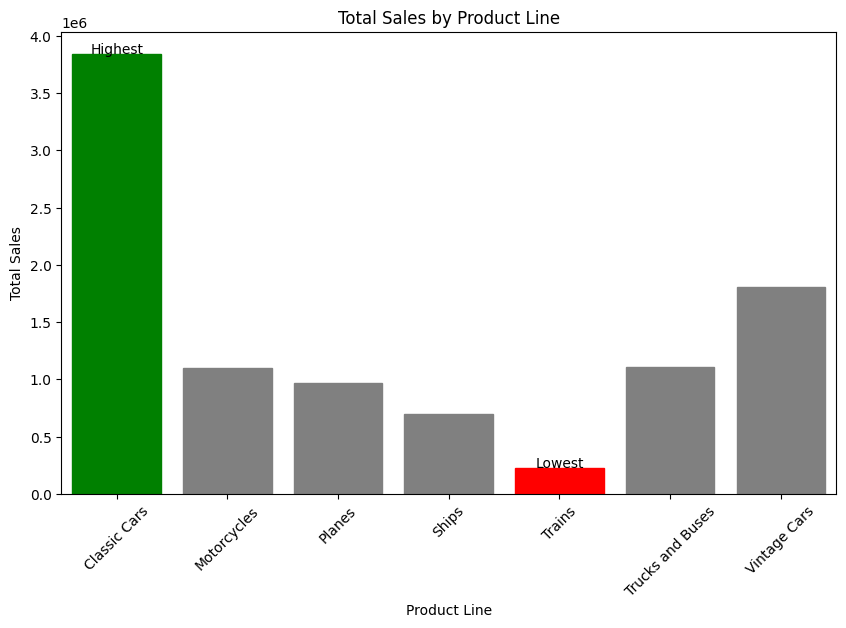

In [38]:
plt.figure(figsize=(10,6))
bars = sns.barplot(x="PRODUCTLINE", y="SALES", data=product)

# Highlight highest and lowest bars
highest_index = product["SALES"].idxmax()
lowest_index = product["SALES"].idxmin()

for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    if i == highest_index:
        #plt.text(x_position, y_position, text_string, ...)
        plt.text(bar.get_x() + bar.get_width()/2, height, 'Highest', ha='center', color='black')
        bar.set_color('green')
    elif i == lowest_index:
        plt.text(bar.get_x() + bar.get_width()/2, height, 'Lowest', ha='center', color='black')
        bar.set_color('red')
    else:
        bar.set_color('gray')

plt.title("Total Sales by Product Line")
plt.ylabel("Total Sales")
plt.xlabel("Product Line")
plt.xticks(rotation=45)
plt.savefig("totalsales_by_productline")
plt.show()

Which country contributes the most to total revenue?

In [39]:
country=df.groupby("COUNTRY")["SALES"].sum().reset_index()
highsale=df.groupby("COUNTRY")["SALES"].sum().idxmax()
totalrevenue=df["SALES"].sum()
print(f"Total Revenue: {totalrevenue}")
print(f"Country with the highest sale is: {highsale}")
print(country)

Total Revenue: 9760221.71
Country with the highest sale is: USA
        COUNTRY       SALES
0     Australia   630623.10
1       Austria   202062.53
2       Belgium   108412.62
3        Canada   224078.56
4       Denmark   245637.15
5       Finland   329581.91
6        France  1110916.52
7       Germany   220472.09
8       Ireland    57756.43
9         Italy   374674.31
10        Japan   188167.81
11       Norway   307463.70
12  Philippines    94015.73
13    Singapore   288488.41
14        Spain  1215686.92
15       Sweden   210014.21
16  Switzerland   117713.56
17           UK   478880.46
18          USA  3355575.69


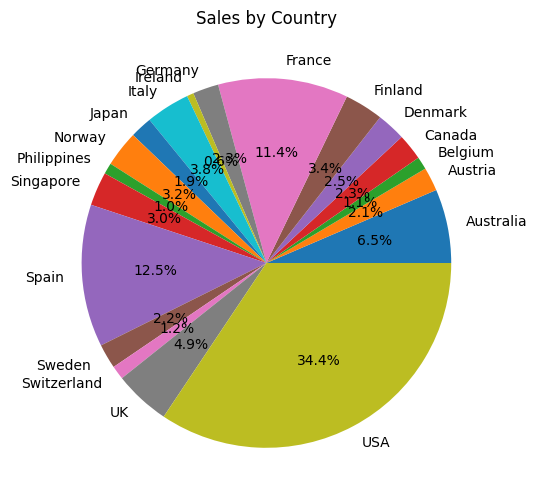

In [40]:
plt.figure(figsize=(8,6))
plt.pie(country['SALES'], labels=country['COUNTRY'], autopct="%1.1f%%")
plt.title("Sales by Country")
plt.savefig("sales_by_country.png")
plt.show()

How does revenue distribution vary by territory or region?

In [41]:
df["TERRITORY"]

0       Unknown
1          EMEA
2          EMEA
3       Unknown
5       Unknown
         ...   
2818       EMEA
2819       EMEA
2820       EMEA
2821       EMEA
2822    Unknown
Name: TERRITORY, Length: 2747, dtype: object

In [42]:
df["TERRITORY"].nunique()
df["TERRITORY"].unique().tolist()

['Unknown', 'EMEA', 'APAC', 'Japan']

  TERRITORY       SALES
0      APAC   746121.83
1      EMEA  4979272.41
2     Japan   455173.22
3   Unknown  3579654.25


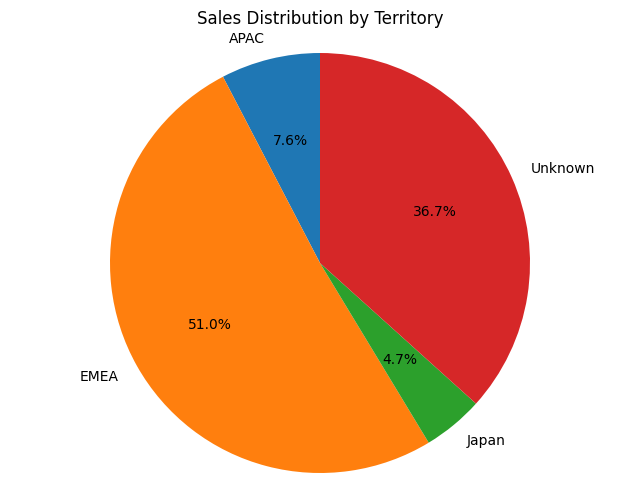

In [43]:
territory=df.groupby("TERRITORY")["SALES"].sum().reset_index()
print(territory)
plt.figure(figsize=(8,6))
plt.pie(territory["SALES"], labels=territory["TERRITORY"], autopct='%1.1f%%', startangle=90)
plt.title("Sales Distribution by Territory")
plt.axis('equal')  # Makes the pie chart circular
plt.savefig("sales_distribution_by_territory.png")
plt.show()

Which city has the highest number of orders placed?

In [44]:
df["CITY"].unique().tolist()

['NYC',
 'Reims',
 'Paris',
 'Pasadena',
 'Burlingame',
 'Lille',
 'Bergen',
 'Melbourne',
 'Newark',
 'Bridgewater',
 'Nantes',
 'Cambridge',
 'Helsinki',
 'Stavern',
 'Allentown',
 'Salzburg',
 'Chatswood',
 'New Bedford',
 'Liverpool',
 'Madrid',
 'Lule',
 'Singapore',
 'South Brisbane',
 'Philadelphia',
 'Lyon',
 'Vancouver',
 'Burbank',
 'New Haven',
 'Minato-ku',
 'Torino',
 'Boras',
 'Versailles',
 'San Rafael',
 'Nashua',
 'Brickhaven',
 'North Sydney',
 'Montreal',
 'Osaka',
 'White Plains',
 'Kobenhavn',
 'London',
 'Toulouse',
 'Barcelona',
 'San Diego',
 'Bruxelles',
 'Tsawassen',
 'Boston',
 'Cowes',
 'Oulu',
 'San Jose',
 'Graz',
 'Makati City',
 'Marseille',
 'Koln',
 'Gensve',
 'Reggio Emilia',
 'Frankfurt',
 'Espoo',
 'Dublin',
 'Manchester',
 'Aaarhus',
 'Glendale',
 'Sevilla',
 'Brisbane',
 'Strasbourg',
 'Las Vegas',
 'Oslo',
 'Bergamo',
 'Glen Waverly',
 'Munich',
 'Charleroi']

In [41]:
order=df.groupby("CITY")["QUANTITYORDERED"].sum().reset_index()
print(order)
highorders = order.sort_values("QUANTITYORDERED", ascending=False).head(10)
print(f"{highorders["CITY"]} has the highest order")

            CITY  QUANTITYORDERED
0        Aaarhus              882
1      Allentown             1111
2      Barcelona              882
3        Bergamo             1650
4         Bergen              973
..           ...              ...
66      Toulouse              687
67     Tsawassen              873
68     Vancouver              703
69    Versailles              637
70  White Plains              929

[71 rows x 2 columns]
33         Madrid
59     San Rafael
41            NYC
61      Singapore
51          Paris
42         Nantes
44    New Bedford
37      Melbourne
35     Manchester
58       San Jose
Name: CITY, dtype: object has the highest order


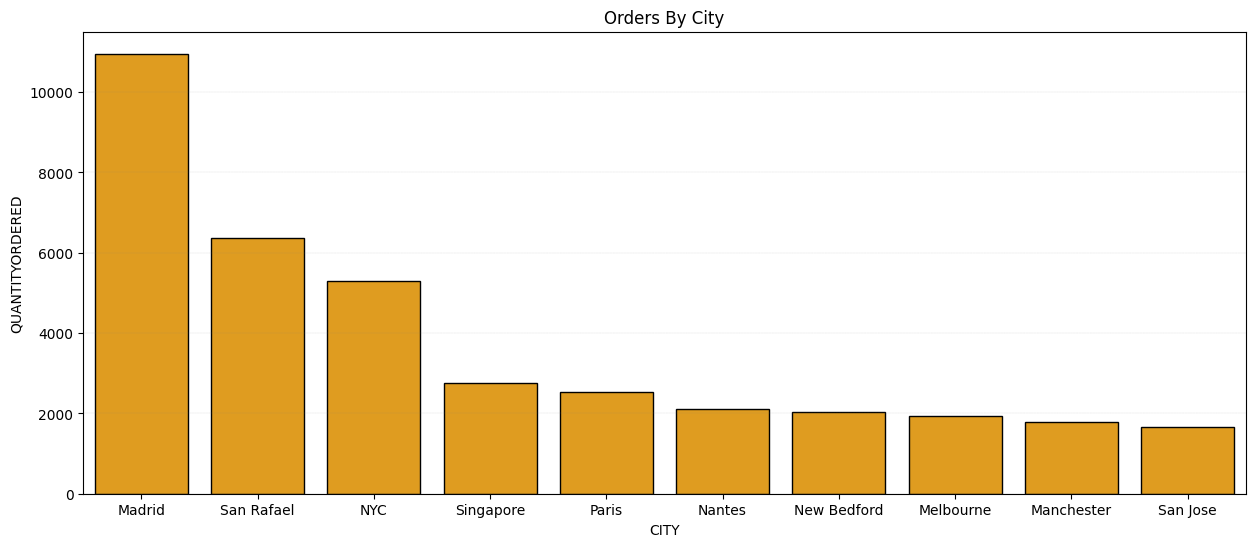

In [42]:
plt.figure(figsize=(15,6))
plt.grid(True,color="gray",linestyle="--",linewidth=0.1)
sns.barplot(x="CITY",y="QUANTITYORDERED",data=highorders,color="orange",saturation=0.75,edgecolor="black")
plt.title("Orders By City")
plt.show()

Who are the top 10 customers based on total purchase amount?

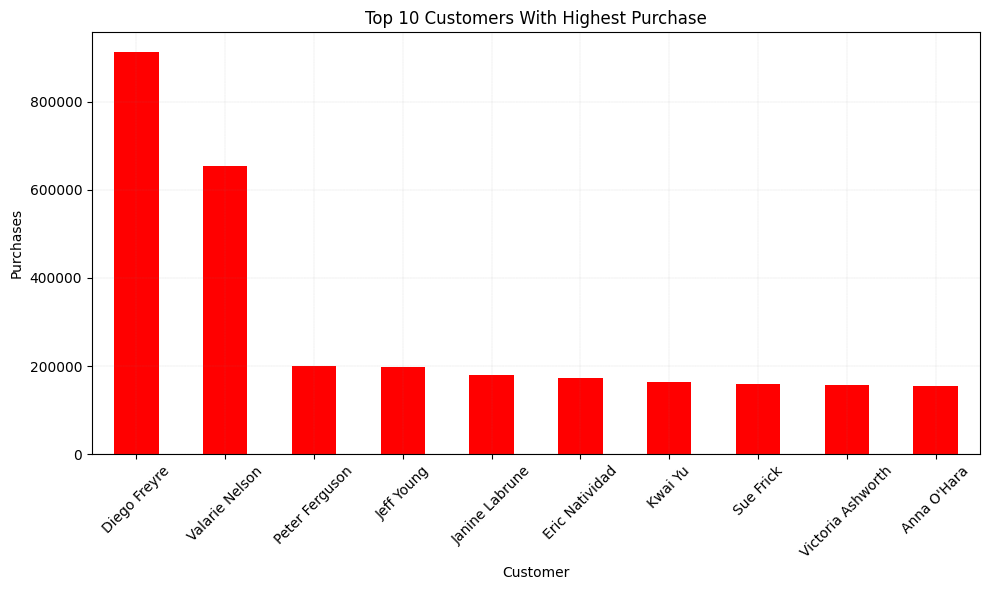

In [45]:
top = df.groupby('CUSTOMERNAME')['SALES'].sum().nlargest(10)
top.plot(kind="bar", color="red", figsize=(10,6)) 
plt.grid(True,color="gray",linestyle="--",linewidth=0.1)
plt.title("Top 10 Customers With Highest Purchase")
plt.xlabel("Customer")
plt.ylabel("Purchases")
plt.xticks(rotation=45)  # Rotate for better readability
plt.tight_layout()
plt.savefig("top10_customers_with_highest_sales")
plt.show()


Which customers placed multiple large-quantity orders (outliers)?

['Frederique Citeaux' 'Sue Frick' 'Diego Freyre' 'Georg Pipps'
 'William Brown']


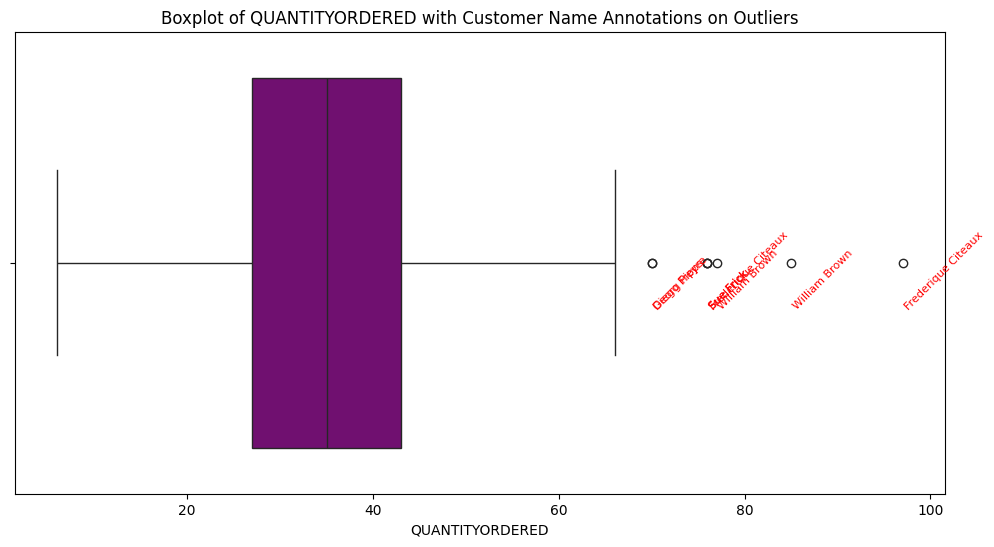

In [46]:
Q1=df["QUANTITYORDERED"].quantile(0.25)
Q3=df["QUANTITYORDERED"].quantile(0.75)

IQR=Q3-Q1

outlier_customers = df[df['QUANTITYORDERED'] > Q3 + 1.5 * IQR]['CUSTOMERNAME'].unique()
print(outlier_customers)


plt.figure(figsize=(12, 6))
sns.boxplot(x=df['QUANTITYORDERED'],color="purple")

# Step 2: Calculate IQR for outlier detection
Q1 = df['QUANTITYORDERED'].quantile(0.25)
Q3 = df['QUANTITYORDERED'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter out the outlier rows
outliers = df[df['QUANTITYORDERED'] > upper_bound]

# Step 4: Annotate customer names on the outlier points
for i in range(outliers.shape[0]):
    x = outliers['QUANTITYORDERED'].iloc[i]
    y = 0  # y is 0 because boxplot is horizontal
    name = outliers['CONTACTFIRSTNAME'].iloc[i] + " " + outliers['CONTACTLASTNAME'].iloc[i]
    plt.text(x, y + 0.1, name, rotation=45, fontsize=8, color='red')

plt.title("Boxplot of QUANTITYORDERED with Customer Name Annotations on Outliers")
plt.xlabel("QUANTITYORDERED")
plt.savefig("quantityordered.png")
plt.show()

What percentage of total sales comes from returning customers vs. new customers?

Returning Customers: 95.47% of total sales
New Customers: 4.53% of total sales


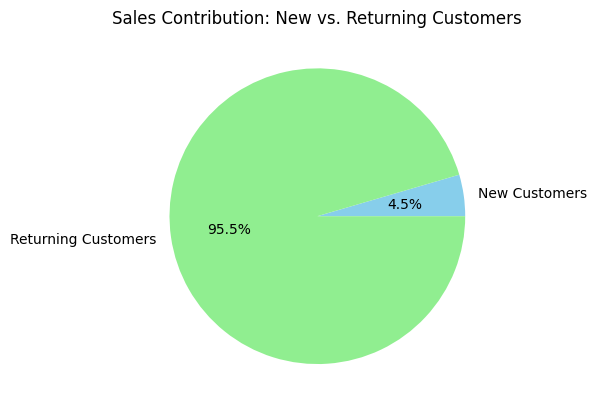

In [47]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df = df.sort_values(['CUSTOMERNAME', 'ORDERDATE'])

df['IS_RETURNING'] = df.duplicated(subset='CUSTOMERNAME', keep='first')

sales_summary = df.groupby('IS_RETURNING')['SALES'].sum()

total_sales = sales_summary.sum()
returning_percent = (sales_summary[True] / total_sales) * 100
new_percent = (sales_summary[False] / total_sales) * 100

print(f"Returning Customers: {returning_percent:.2f}% of total sales")
print(f"New Customers: {new_percent:.2f}% of total sales")


labels = ['New Customers', 'Returning Customers']
sizes = [new_percent, returning_percent]
colors = ['skyblue', 'lightgreen']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Sales Contribution: New vs. Returning Customers')
plt.savefig("sales_distribution.png")
plt.show()


What is the distribution of deal sizes (Small/Medium/Large) among orders?

DEALSIZE
Medium    1349
Small     1246
Large      152
Name: count, dtype: int64


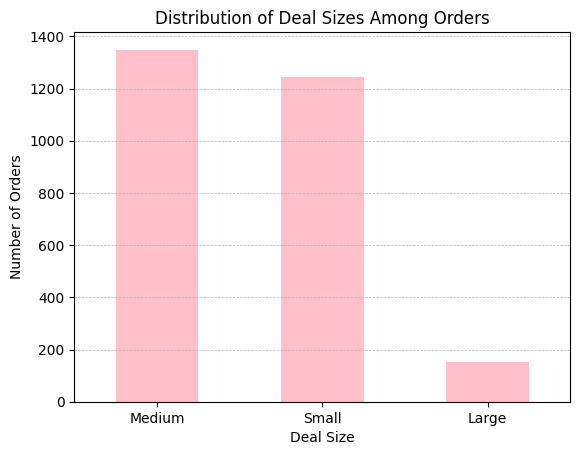

In [48]:
distribution=df["DEALSIZE"].value_counts()
print(distribution)
import matplotlib.pyplot as plt

distribution = df["DEALSIZE"].value_counts()

# Plotting as bar chart (not histogram since it's categorical)
distribution.plot(kind="bar", color="pink")

plt.title("Distribution of Deal Sizes Among Orders")
plt.xlabel("Deal Size")
plt.ylabel("Number of Orders")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.savefig("distribution_of_dealsizes.png")
plt.show()

Which product codes are sold most frequently?

In [49]:
most_frequent_products = df['PRODUCTCODE'].value_counts()
print(most_frequent_products)



PRODUCTCODE
S18_3232    51
S32_2509    28
S24_2840    28
S24_1444    28
S50_1392    28
            ..
S24_2887    22
S24_3969    21
S18_1749    21
S18_2248    21
S18_4409    21
Name: count, Length: 109, dtype: int64


PRODUCTCODE
S18_3232     51
S32_2509     28
S24_2840     28
S24_1444     28
S50_1392     28
S700_2466    27
S700_4002    27
S12_4473     27
S18_4600     27
S10_4962     27
Name: count, dtype: int64


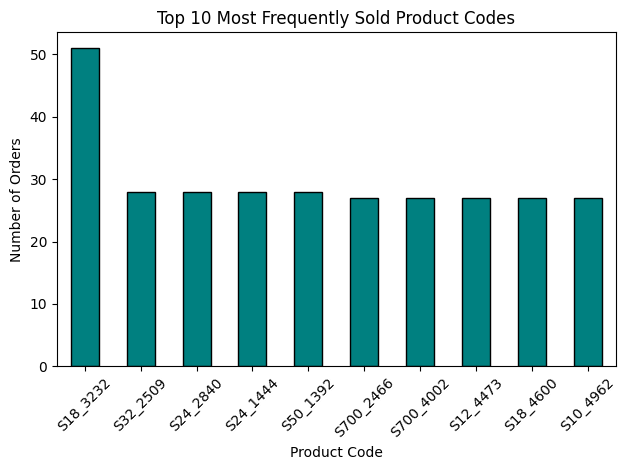

In [50]:
top_10_products = df['PRODUCTCODE'].value_counts().head(10)
print(top_10_products)

top_10_products.plot(kind='bar', color='teal', edgecolor='black')

plt.title("Top 10 Most Frequently Sold Product Codes")
plt.xlabel("Product Code")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("most_frequently_sold_products.png")
plt.show()

Which product lines have the highest average selling price?

In [51]:
# Group by product line and calculate average price per unit
avg_price_by_productline = df.groupby('PRODUCTLINE')['PRICEEACH'].mean().sort_values(ascending=False)

print(avg_price_by_productline)


PRODUCTLINE
Trucks and Buses    87.749627
Classic Cars        87.288325
Ships               83.708391
Motorcycles         82.848083
Planes              81.861250
Vintage Cars        78.005769
Trains              75.654675
Name: PRICEEACH, dtype: float64


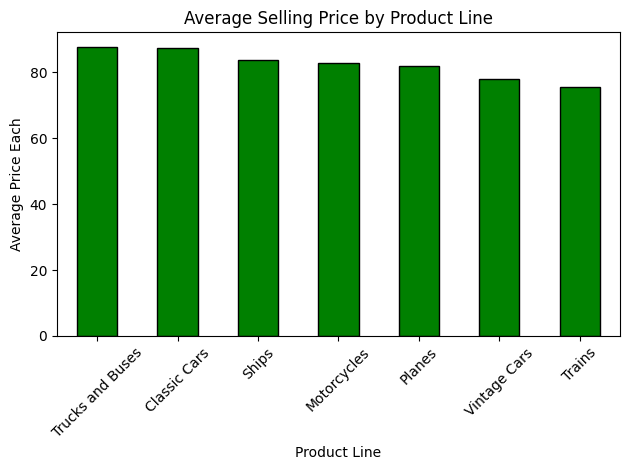

In [52]:
avg_price_by_productline.plot(kind='bar', color="Green", edgecolor='black')

plt.title("Average Selling Price by Product Line")
plt.xlabel("Product Line")
plt.ylabel("Average Price Each")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("averageselling_price.png")
plt.show()

How many products are being sold below the manufacturer’s suggested retail price (MSRP)?

1901


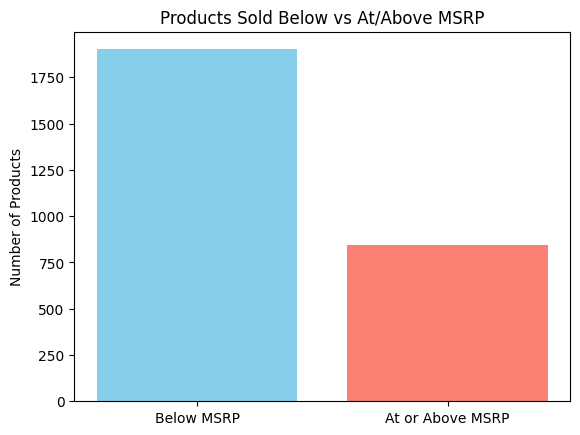

In [56]:
below_msrp = (df['PRICEEACH'] < df['MSRP']).sum()
print(below_msrp)
not_below_msrp = (df['PRICEEACH'] >= df['MSRP']).sum()

# Data
labels = ['Below MSRP', 'At or Above MSRP']
values = [below_msrp, not_below_msrp]
colors = ['skyblue', 'salmon']

# Plot
plt.bar(labels, values, color=colors)
plt.title("Products Sold Below vs At/Above MSRP")
plt.ylabel("Number of Products")
plt.savefig("at_above_MSRP")
plt.show()

How many orders were delayed or canceled (STATUS column)?

In [57]:
orders=df['STATUS'].value_counts()
print(orders)

STATUS
Shipped       2541
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: count, dtype: int64


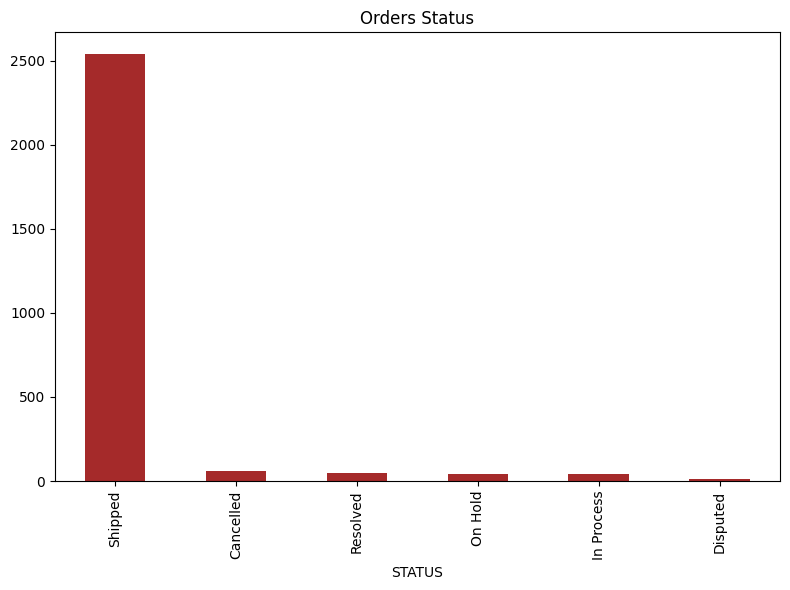

In [58]:
plt.figure(figsize=(8,6))
orders.plot(kind="bar",color="brown")
plt.title("Orders Status")
plt.tight_layout()
plt.savefig("order_stautus.png")
plt.show()